## Problem Statement:
The area Stock market is something which is with lots of ups and downs. It can 
change in no time. Therefore we can use machine learning technique to identify
market changes earlier than possible with traditional investment models.
Using machine Learning models we can automate the investment predictions process.


###### 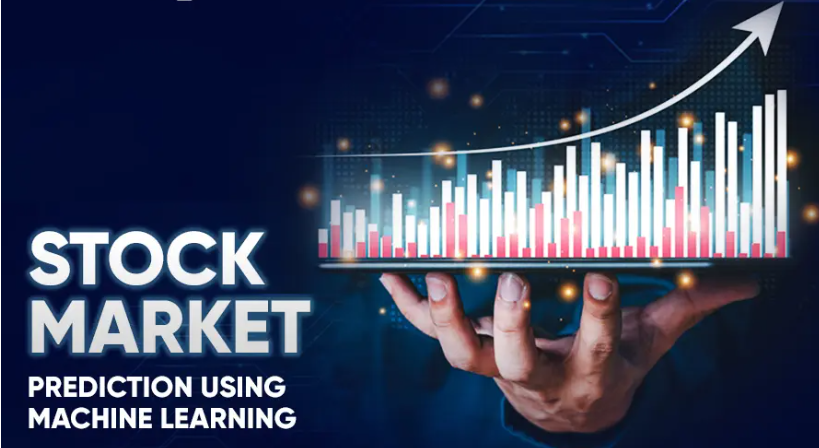

In [1]:
# Importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
from matplotlib import patches
from scipy.spatial import ConvexHull
sns.set_style("white")

In [2]:
# Reading data using Pandas libraray of Python 

Stocks_data = pd.read_csv("1613615-Stock_Price_data_set.csv")
Stocks_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
Stocks_data.columns = (['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'])

In [4]:
Stocks_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [5]:
# Taking a short info of the Stocks data

Stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj_Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
Stocks_data.value_counts() # Value counts

Date        Open        High        Low         Close       Adj_Close   Volume  
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  11896100    1
2020-10-14  562.609985  572.489990  541.000000  541.450012  541.450012  9499000     1
2020-09-25  474.390015  484.869995  468.029999  482.880005  482.880005  3769400     1
2020-09-28  489.109985  492.000000  477.880005  490.649994  490.649994  4773500     1
2020-09-29  489.500000  496.290009  486.529999  493.480011  493.480011  3541500     1
                                                                                   ..
2019-06-14  341.630005  343.399994  336.160004  339.730011  339.730011  5019000     1
2019-06-17  342.690002  351.769989  342.059998  350.619995  350.619995  5358200     1
2019-06-18  355.570007  361.500000  353.750000  357.119995  357.119995  5428500     1
2019-06-19  361.720001  364.739990  356.119995  363.519989  363.519989  5667200     1
2022-02-04  407.309998  412.769989  396.640015  410.170013 

In [7]:
Stocks_data['High'].value_counts(normalize = True) # Value counts after normalizing 

303.549988    0.001982
353.609985    0.001982
505.100006    0.001982
447.000000    0.001982
514.500000    0.001982
                ...   
375.000000    0.000991
371.000000    0.000991
366.790009    0.000991
370.850006    0.000991
412.769989    0.000991
Name: High, Length: 983, dtype: float64

In [8]:
Stocks_data.shape # Checking shape of the data

(1009, 7)

In [9]:
Stocks_data.apply(np.max)

Date         2022-02-04
Open         692.349976
High          700.98999
Low          686.090027
Close        691.690002
Adj_Close    691.690002
Volume         58904300
dtype: object

In [10]:
# Checking data type of all the columns

Stocks_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

### Suppose we want to see how observations in our sample are distributed in the context of two features Low and High. To do this, we can build cross tabulation by the crosstab method.

In [11]:
pd.crosstab(Stocks_data["Low"], Stocks_data["High"])

High,250.649994,254.500000,255.589996,255.800003,259.149994,261.410004,261.910004,264.500000,265.000000,265.500000,...,685.260010,685.940002,687.679993,688.359985,689.390015,689.969971,690.969971,691.739990,694.159973,700.989990
Low,,,,,,,,,,,,,,,,,,,,,
231.229996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233.679993,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236.110001,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240.100006,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241.289993,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676.539978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
676.900024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
677.270020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Here 0 is showing the Low prices of the stocks and 1 showing the High price of the Stocks in the market as per the given data.

In [12]:
pd.crosstab(Stocks_data["Low"],
            Stocks_data["High"],
            normalize = 'index')

## After normalizing the indexes

High,250.649994,254.500000,255.589996,255.800003,259.149994,261.410004,261.910004,264.500000,265.000000,265.500000,...,685.260010,685.940002,687.679993,688.359985,689.390015,689.969971,690.969971,691.739990,694.159973,700.989990
Low,,,,,,,,,,,,,,,,,,,,,
231.229996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233.679993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236.110001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240.100006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241.289993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676.539978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
676.900024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
677.270020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
Stocks_data.pivot_table(
    ["Low", "High"],
    ["Volume"],
    aggfunc = "mean",
).head(10)

,High,Low
Volume,,
1144000,519.349976,512.210022
1287200,613.979980,604.679993
1367800,522.669983,517.989990
1595500,552.599976,545.900024
1621100,616.880005,607.570007
1625100,620.609985,611.239990
1673900,519.570007,509.769989
1685700,513.000000,507.200012
1736000,520.780029,513.789978


### The obtained results allow us to plan or to do investment more effectively.

In [14]:
Stocks_data.ndim # dimension of the data

2

In [15]:
Stocks_data['Low'].mean() # Mean value of the stocks

412.37404380178384

In [16]:
Stocks_data['Low'].min() # Minimum value of the stocks

231.229996

In [17]:
Stocks_data.describe() # Statistical analysis of the data

,Open,High,Low,Close,Adj_Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [18]:
# Checking Null Values in the data

Stocks_data.isnull().sum().sum()

0

## Observation 

No Null Values in the data

## Data Visualization 

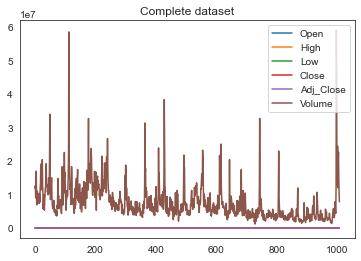

In [19]:
Stocks_data.plot()
plt.title("Complete dataset")
plt.show()

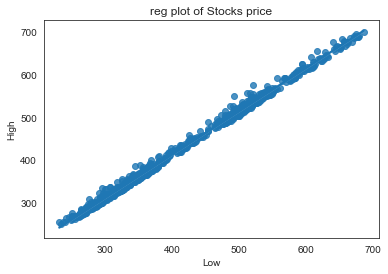

In [20]:
sns.regplot(data = Stocks_data, x = 'Low', y = 'High', logistic = False)
plt.title("reg plot of Stocks price")
plt.show()


#### It is a regression plot, the regplot() function takes an argument logistic, which allows you to specify whether you wish to estimate the logistic regression model for the given data using True or False values.
#### But un this project we are applying many models so no need to set True here..

<AxesSubplot:xlabel='High', ylabel='Density'>

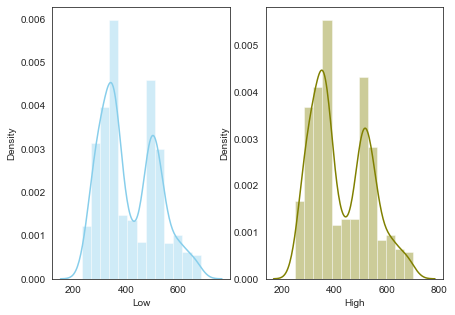

In [21]:
# Create subplots 
f, axes = plt.subplots(1, 2, figsize=(7, 5))

# Plot Histogram plot with Low column
sns.distplot(Stocks_data["Low"] , color="skyblue", ax=axes[0])

# Plot Histogram plot with High column
sns.distplot( Stocks_data["High"] , color="olive", ax=axes[1])

#### The plot is just showing the density like how the Low and High values of Stock price  are increasing or decreasing at the same. time

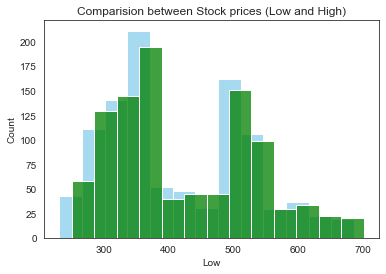

In [22]:
# Plotting a histogram to view how the 'Low' and 'High' feature are laid out.

sns.histplot(data=Stocks_data["Low"] , color="skyblue", label="Increasing of Stocks Price (High)")
sns.histplot(data=Stocks_data["High"] , color="green", label="Decreasing of Stocks Price (Low)")
plt.title("Comparision between Stock prices (Low and High)")
plt.show()

### You can easily compare between the increasing/ decreasing of the Stocks (Low & High).

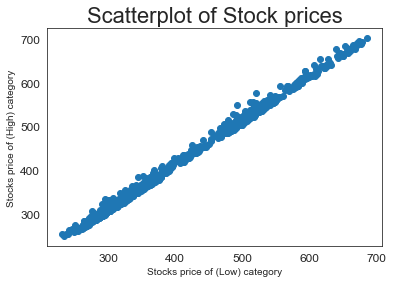

In [23]:
plt.scatter(x = Stocks_data['Low'], y = Stocks_data['High'])
plt.xlabel("Stocks price of (Low) category")
plt.ylabel("Stocks price of (High) category")
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Stock prices", fontsize=22)
plt.show()    

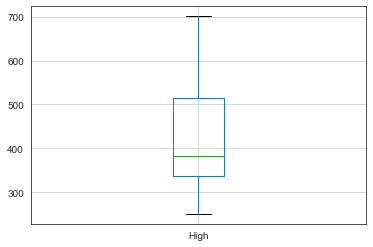

In [24]:
Stocks_data.boxplot(column = "High")
plt.show()

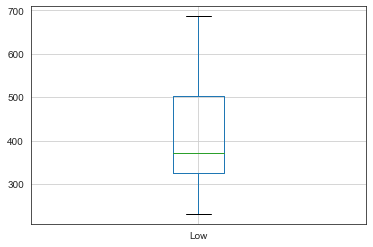

In [25]:
Stocks_data.boxplot(column = "Low")
plt.show()



#### The above  boxplots are showing that there are no outliers and also showing the lowest value of stock price that is about 380 approx.

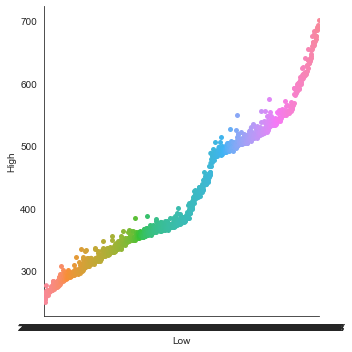

In [26]:
sns.catplot(data = Stocks_data, x = 'Low', y = 'High')
plt.show()

#### The catplot is correctly showing the increase in stocks price from Low to High.

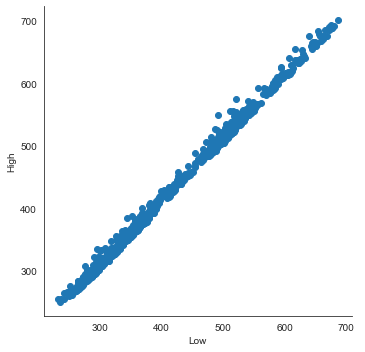

In [27]:
sns.FacetGrid(Stocks_data, size=5) \
   .map(plt.scatter, "Low", "High") \
   .add_legend()
plt.show()


# Same thing as catplot

In [28]:
# Viewing all the Integer columns
ints = Stocks_data.select_dtypes(exclude = 'object').columns.to_list()
ints

['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

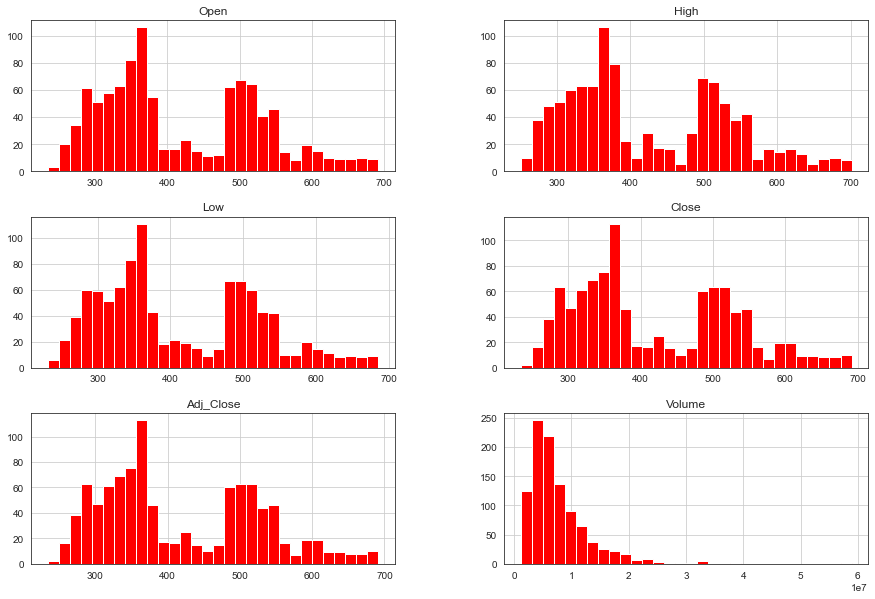

In [29]:
# Histogram

Stocks_data.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

#### A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.

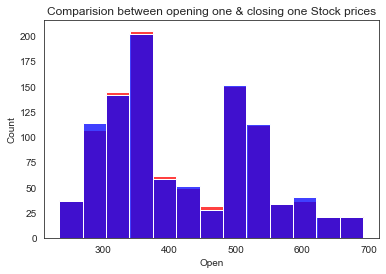

In [30]:
# Plotting a histogram to view how the 'open' and 'close' feature are laid out.

sns.histplot(data=Stocks_data["Open"] , color="red", label="Opening of Stocks Price")
sns.histplot(data=Stocks_data["Close"] , color="blue", label="Closing of Stocks Price")
plt.title("Comparision between opening one & closing one Stock prices")
plt.show()

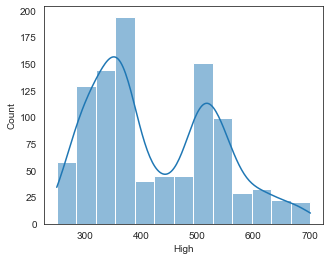

In [31]:
plt.figure(figsize = (5, 4))
sns.histplot(data = Stocks_data, x = "High", kde = True)
plt.show()

#### The histogram showing the increase in the Stock Prices.

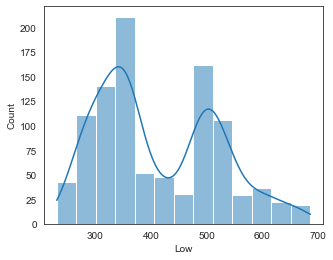

In [32]:
plt.figure(figsize = (5, 4))
sns.histplot(data = Stocks_data, x = "Low", kde = True)
plt.show()

#### The histogram showing the decrease in the Stock Prices.

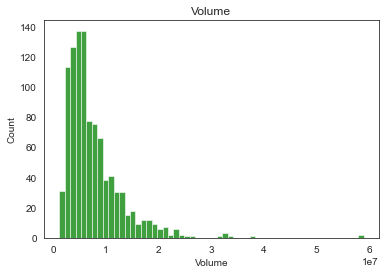

In [33]:
sns.histplot(data = Stocks_data["Volume"] , color="green", label="Volume of the Stocks")
plt.title("Volume")
plt.show()

### The histogram just showing how the volume of the stocks is increasing or decreasing in the market

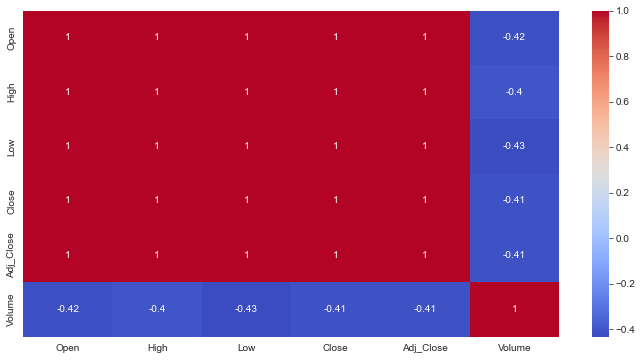

In [34]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(Stocks_data.corr(), annot = True, cmap = "coolwarm")
plt.show()

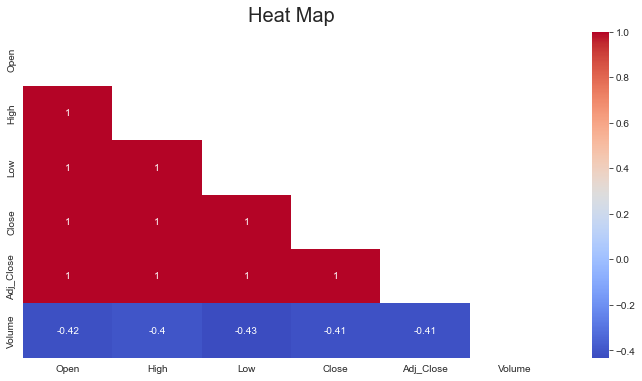

In [35]:
# You will not loose any information if you cut down one part of the heatmap along the diagonal

mask = np.triu(np.ones_like(Stocks_data.corr(), dtype = np.bool))
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(Stocks_data.corr(), cmap = "coolwarm", annot = True, mask = mask)
heatmap.set_title("Heat Map", fontsize = 20, pad = 10)
plt.show()

#### The following code returns the correlation of all features with 'Low' and 'High', a single, dependent variable, sorted in descending order

In [36]:
correlation = Stocks_data.corr()[['Low']].sort_values(by = 'Low', ascending = False)
print(correlation)

                Low
Low        1.000000
Close      0.998544
Adj_Close  0.998544
Open       0.998508
High       0.998203
Volume    -0.432116


In [37]:
correlation2 = Stocks_data.corr()[['High']].sort_values(by = 'High', ascending = False)
print(correlation2)

               High
High       1.000000
Open       0.998605
Close      0.998551
Adj_Close  0.998551
Low        0.998203
Volume    -0.400699


### Observation
The correlation between the columns,

Here you can see the above cell in descending order the close is about 99 percent correlated and open is also 99 percent correlated and so on in descending order

Same you can check from heatmap plotted Below------

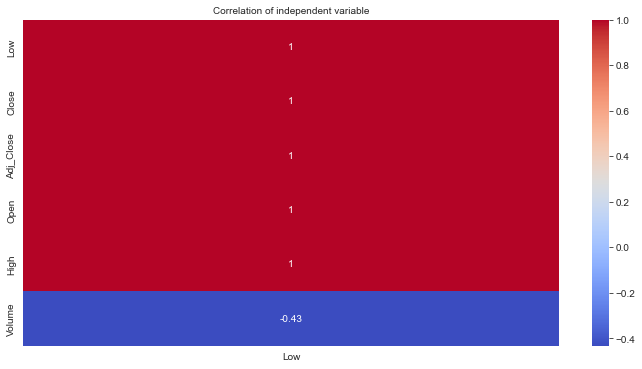

In [38]:
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(correlation, cmap = "coolwarm", vmax = 1, annot = True)
heatmap.set_title("Correlation of independent variable", fontsize = 10)
plt.show()

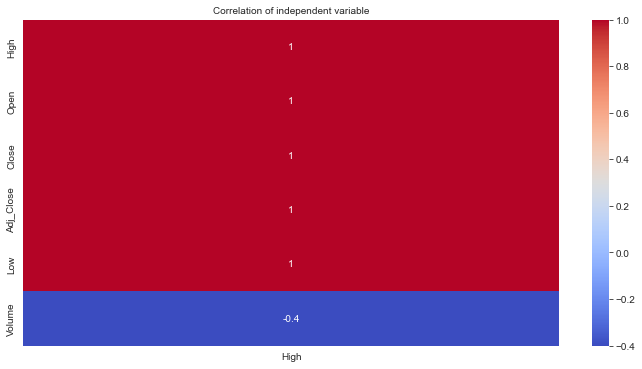

In [39]:
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(correlation2, cmap = "coolwarm", vmax = 1, annot = True)
heatmap.set_title("Correlation of independent variable", fontsize = 10)
plt.show()

### Insights

We will select the columns which are positevely correlated in our dataset while selecting negatively correlated data as you can see in the heatmap that High column is highly correlated but Volume is 0.4 percent correlated but negatively correlated.
The red column is highly correlated  while the blue column is less correlated

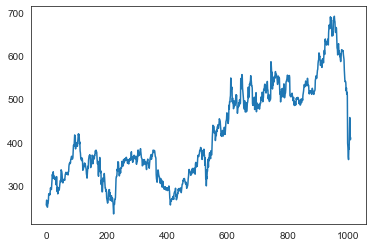

In [40]:
Stocks_data['Adj_Close'].plot()
plt.show()

### Now,  the basic Cleaning, visualization,  EDA and feature Engineering is done , now Building the machine learning models.

## Prediction Part----

In [41]:
# Required libraries for data preprocessing and predictions

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [42]:
# Setting the target values for prediction 


#Selecting the Features
X = Stocks_data[['Open', 'High', 'Low', 'Volume']]
Y = Stocks_data.Adj_Close

In [43]:
# Dividing the data into training and testing 

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [44]:
X_train.shape ,X_test.shape ,y_train.shape  , y_test.shape # Training and testing data

((807, 4), (202, 4), (807,), (202,))

In [45]:
### Let's apply Machine learning algorithms or Regressors

In [46]:
y_test = np.array(y_test)

### 1) LSTM MODEL(LONG SHORT TERM MEMORY MODEL)

In [47]:
# Building the model

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [48]:
# Fitting the model

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = regressor.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32)
history

Epoch 1/100
26/26 [==============================] - 30s 235ms/step - loss: 185933.2188 - val_loss: 188584.9531
Epoch 2/100
26/26 [==============================] - 1s 27ms/step - loss: 182076.8750 - val_loss: 183987.0469
Epoch 3/100
26/26 [==============================] - 1s 29ms/step - loss: 178715.9375 - val_loss: 181673.2031
Epoch 4/100
26/26 [==============================] - 1s 28ms/step - loss: 176809.7344 - val_loss: 180068.4219
Epoch 5/100
26/26 [==============================] - 1s 40ms/step - loss: 175364.6250 - val_loss: 178704.3750
Epoch 6/100
26/26 [==============================] - 1s 27ms/step - loss: 174046.2812 - val_loss: 177452.0156
Epoch 7/100
26/26 [==============================] - 1s 30ms/step - loss: 172872.2031 - val_loss: 176266.5312
Epoch 8/100
26/26 [==============================] - 1s 31ms/step - loss: 171704.4688 - val_loss: 175115.7656
Epoch 9/100
26/26 [==============================] - 1s 33ms/step - loss: 170585.4531 - val_loss: 173990.8750
Epoch 10

Minimum Validation Loss: 99432.5781


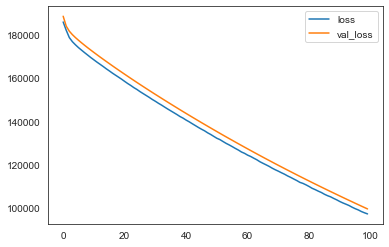

In [49]:
history_Stocks= pd.DataFrame(history.history)
history_Stocks.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_Stocks['val_loss'].min()))

In [50]:
len(Stocks_data)

1009

In [51]:
actual_training_set = Stocks_data.iloc[:, 1:2].values
actual_training_set.ndim

2

In [52]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_traning_set = scaler.fit_transform(actual_training_set)
scaled_traning_set

array([[0.06125254],
       [0.03005911],
       [0.07124314],
       ...,
       [0.46753051],
       [0.4090483 ],
       [0.3782257 ]])

In [53]:
predicted_stock_price = regressor.predict(X_test)

7/7 [==============================] - 7s 12ms/step


In [54]:
reshape_stock_price = predicted_stock_price.reshape(-1, 1)
reshape_stock_price.shape

(808, 1)

In [55]:
predicted_stock_price_Total = scaler.inverse_transform(reshape_stock_price)
predicted_stock_price_Total.shape

(808, 1)

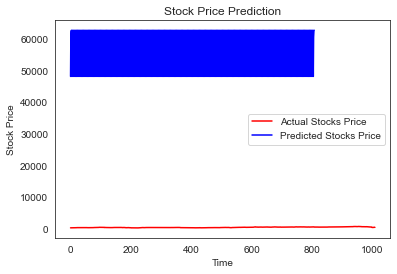

In [56]:
plt.plot(actual_training_set, color = 'red', label = 'Actual Stocks Price')
plt.plot(predicted_stock_price_Total, color = 'blue', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [57]:
predicted_stock_price_Total = predicted_stock_price.reshape(-1)
actual_training_set = actual_training_set.reshape(-1)

In [58]:
actual_training_set.shape

(1009,)

In [59]:
Actual = pd.DataFrame({'Actual':actual_training_set})
Actual

,Actual
0,262.000000
1,247.699997
2,266.579987
3,267.079987
4,253.850006
...,...
1004,401.970001
1005,432.959991
1006,448.250000
1007,421.440002


In [60]:
Predicted = pd.DataFrame({'Predicted Monthly Sales': predicted_stock_price_Total})
Predicted

,Predicted Monthly Sales
0,104.372162
1,131.473267
2,135.626648
3,136.198868
4,104.372162
...,...
803,136.198868
804,104.372162
805,131.473282
806,135.626648


## Now, Machine learning algorithms for prediction---

### 2) Decision Tree Algorithm

In [61]:
# Importing required libraries first

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [62]:
Dt_model = DecisionTreeRegressor(random_state = 1)
Dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [63]:
print('[1]Decision Tree Regressor Training Accuracy:', Dt_model.score(X_train, y_train))

[1]Decision Tree Regressor Training Accuracy: 1.0


In [64]:
dt_preds = Dt_model.predict(X_test)

In [65]:
print("MAE from Approach 2 Decision Tree Regressor:")
mean_absolute_error(y_test, dt_preds)

MAE from Approach 2 Decision Tree Regressor:


4.26059578217822

In [66]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': dt_preds})
comparison

,Actual,Predicted
0,553.729980,555.309998
1,379.059998,381.890015
2,361.399994,359.970001
3,281.859985,278.549988
4,261.429993,264.750000
...,...,...
197,504.790009,515.409973
198,315.339996,315.000000
199,257.950012,250.100006
200,305.160004,306.160004


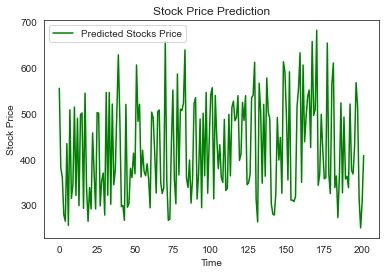

In [67]:
plt.plot(dt_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

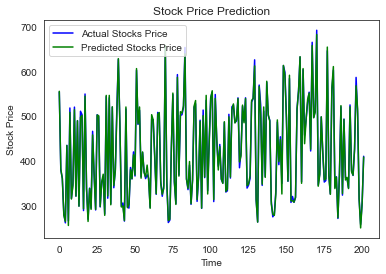

In [68]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(dt_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Observation 

The calculated accuracy of the Decision Tree model is 1.0.

The calculated error of the Decision Tree model is 4.26059578217822.

### 3) Random Forest

In [69]:
# Importing required libraries first

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [70]:
# Method for comparing different approaches
model = RandomForestRegressor(n_estimators=100, random_state=0) # 100 are the forests random forests
model.fit(X_train, y_train)
rf_preds = model.predict(X_test)

In [71]:
print('[2]Random Forest Classifier Training Accuracy:', model.score(X_train, y_train))

[2]Random Forest Classifier Training Accuracy: 0.9996801041884413


In [72]:
print("MAE from Approach 1 Random Forest Regressor:")
print(mean_absolute_error(rf_preds, y_test))

MAE from Approach 1 Random Forest Regressor:
3.711670975297044


In [73]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': rf_preds})

In [74]:
comparison

,Actual,Predicted
0,553.729980,554.705716
1,379.059998,380.283401
2,361.399994,360.964002
3,281.859985,281.687293
4,261.429993,261.106698
...,...,...
197,504.790009,509.419692
198,315.339996,312.854800
199,257.950012,254.543196
200,305.160004,304.514199


In [75]:
actual_training_values= np.array(comparison)

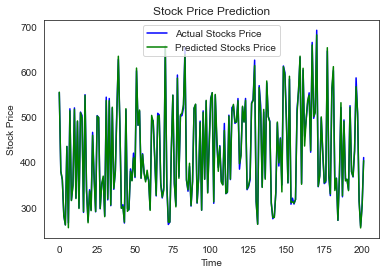

In [76]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(rf_preds, color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Observation 

The calculated accuracy of the Random forest model is 0.99968010418844130.

The calculated error of the Random Forest model is 3.711670975297044.

### 4) Ridge Classifier Method or Regressor

In [77]:
# Importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [78]:
# We can calculate these types of errors using Ridge classifier
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [79]:
params = {'alpha' : [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000,
                                   100000]},
             scoring='neg_mean_absolute_error')

In [80]:
print('[4] RidgeClassifier Training Accuracy:', ridge_regressor.score(X_train, y_train))

[4] RidgeClassifier Training Accuracy: -2.834534365975073


In [81]:
y_train_pred = ridge_regressor.predict(X_test) # predict train result

In [82]:
print("MAE from Approach 4 Ridge Classifier or Regressor:")
mean_absolute_error(y_test, y_train_pred)

MAE from Approach 4 Ridge Classifier or Regressor:


2.9013198814574688

In [83]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': y_train_pred})

In [84]:
comparison

,Actual,Predicted
0,553.729980,553.971012
1,379.059998,379.757155
2,361.399994,360.310529
3,281.859985,283.776008
4,261.429993,260.128418
...,...,...
197,504.790009,507.476185
198,315.339996,314.480526
199,257.950012,255.423282
200,305.160004,306.913361


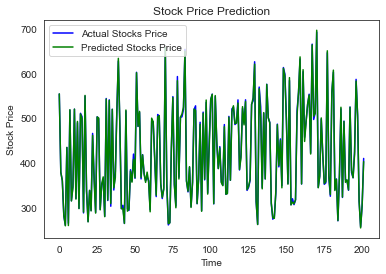

In [85]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(y_train_pred, color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Observation 

The calculated accuracy of the Ridge classifier model is -2.834534365975073.

The calculated error of the Ridge classifier model is 2.9013198814574688 .

### 5) Linear Regression Algorithm

In [86]:
# Using Linear Regression Algorithm to the Training Set
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
results = lin_model.fit(X_train, y_train)
results

LinearRegression()

In [87]:
print('[4] Logistic algorithm or Regressor Training Accuracy:', lin_model.score(X_train, y_train))

[4] Logistic algorithm or Regressor Training Accuracy: 0.9987695016679285


In [88]:
lg_preds = lin_model.predict(X_test)

In [89]:
print("MAE from Approach 5 Logistic algorithm or Regressor:")
mean_absolute_error(y_test, lg_preds)

MAE from Approach 5 Logistic algorithm or Regressor:


2.901319879545852

In [90]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lg_preds})
comparison

,Actual,Predicted
0,553.729980,553.971012
1,379.059998,379.757155
2,361.399994,360.310529
3,281.859985,283.776008
4,261.429993,260.128418
...,...,...
197,504.790009,507.476185
198,315.339996,314.480526
199,257.950012,255.423282
200,305.160004,306.913361


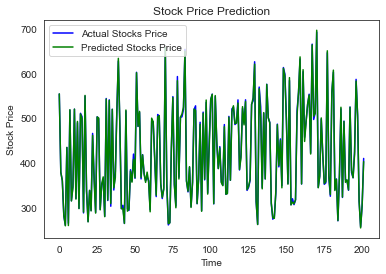

In [91]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(lg_preds, color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Observation 

The calculated accuracy of the Linear Regression model is 0.9987695016679285.

The calculated error of the Linear Regression model is 2.901319879545852.

# CONCLUSION 

Order of the mean absolute error according to the applied machine learning models and classifiers in ascending order is given below---

Linear Regression < Ridge Classifier < Random Forest < Decision Tree

From all models we conclude that Linear Regression is better than using other models because it has less mean absolute error in the comparison of others and the predicted values are also more accurate than others , let's again take a look at the predictions done by the Linear Regression model ----

In [92]:
lg_preds

array([553.9710123 , 379.75715499, 360.31052939, 283.77600754,
       260.12841761, 434.75951257, 260.74990787, 518.66873943,
       315.48347691, 345.48489762, 520.05031298, 319.57645542,
       492.61437106, 298.45577973, 509.20270074, 499.14347163,
       290.73182569, 550.55425666, 338.1050594 , 268.88774901,
       338.98198038, 293.36742057, 461.44827732, 361.95950034,
       288.38667137, 502.66802929, 500.35576967, 295.64490973,
       353.29496369, 369.09476262, 280.44095715, 542.32936631,
       317.56873022, 539.36107029, 309.9250409 , 519.5780388 ,
       344.81937045, 367.38697797, 512.14902109, 633.15564047,
       483.94701584, 298.20399113, 298.66713838, 265.54380772,
       518.05906843, 292.73396801, 297.48202484, 381.96007664,
       357.34378049, 408.02376354, 367.23809342, 601.11033304,
       481.83052369, 515.0560907 , 368.23912408, 418.10837009,
       376.20960153, 356.89297158, 379.6300562 , 357.62789099,
       291.36418889, 499.92180647, 491.86625612, 413.70

In [93]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lg_preds})
comparison

,Actual,Predicted
0,553.729980,553.971012
1,379.059998,379.757155
2,361.399994,360.310529
3,281.859985,283.776008
4,261.429993,260.128418
...,...,...
197,504.790009,507.476185
198,315.339996,314.480526
199,257.950012,255.423282
200,305.160004,306.913361


# Result**
## Hence, we checked and found that using machine Learning models we can automate the investment predictions process.